#MLP  Regression

* Data pipline
* Model structure and design
* Model Compilation
* Training/Testing

In [28]:
# import the needed modules

import tensorflow as tf
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data pipeline

* Read and load the data
* Understand the data
* Remove noise and normalize the data
* Define batches
* Convert to tensors



### Predicting House Prices on Kaggle

Now that we have introduced some basic tools for building and training deep networks and regularizing them with techniques including weight decay and dropout, we are ready to put all this knowledge into practice by participating in a Kaggle competition. The house price prediction competition is a great place to start. The data is fairly generic and do not exhibit exotic structure that might require specialized models (as audio or video might). This dataset covers house prices in Ames, IA from the period of 2006--2010. 


It is considerably larger than the famous [Boston housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names) of Harrison and Rubinfeld (1978), boasting both more examples and more features. In this section, we will walk you through details of data preprocessing, model design, and hyperparameter selection. We hope that through a hands-on approach, you will gain some intuitions that will guide you in your career as a data scientist. 



* The training dataset includes 1460 examples, 80 features, and 1 label
* The validation data contains 1459 examples and 80 features.


On the house price prediction competition page, you can find the dataset (under the "Data" tab), submit predictions, and see your ranking, The URL is right here: > https://www.kaggle.com/c/house-prices-advanced-regression-techniques ![The house price prediction competition page.]

In [29]:


# Make a data directory to store the data!
os.makedirs(os.path.join('.', 'data'), exist_ok=True)


#Thanks to D2L! You can also download from Kaggle
dataname = "HousePrices"
raw_train_url = "http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv"
raw_test_url = "http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv"



def load_data(train_url, test_url, name, folder=".", save_data=False):
  raw_train = pd.read_csv(train_url)
  raw_test = pd.read_csv(test_url)

  if save_data:
    raw_train.to_csv(folder+name+"Train.csv")
    raw_test.to_csv(folder+name+"Test.csv")

  return raw_train, raw_test



raw_train, raw_test = load_data(raw_train_url, raw_test_url, dataname, "data/", save_data=False)

raw_train.shape, raw_test.shape

((1460, 81), (1459, 80))

**Have a look at the data!**



In [30]:
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Here is the columns!**

In [31]:
#All columns
raw_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Numeric columns**

In [ ]:
#numeric columns
numeric_columns = raw_test.dtypes[raw_test.dtypes!='object'].index
numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

**Object columns**

In [ ]:
#object columns
object_columns = raw_test.dtypes[raw_test.dtypes=='object'].index
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

**Understand the data**

Plot histogram of numerical variables

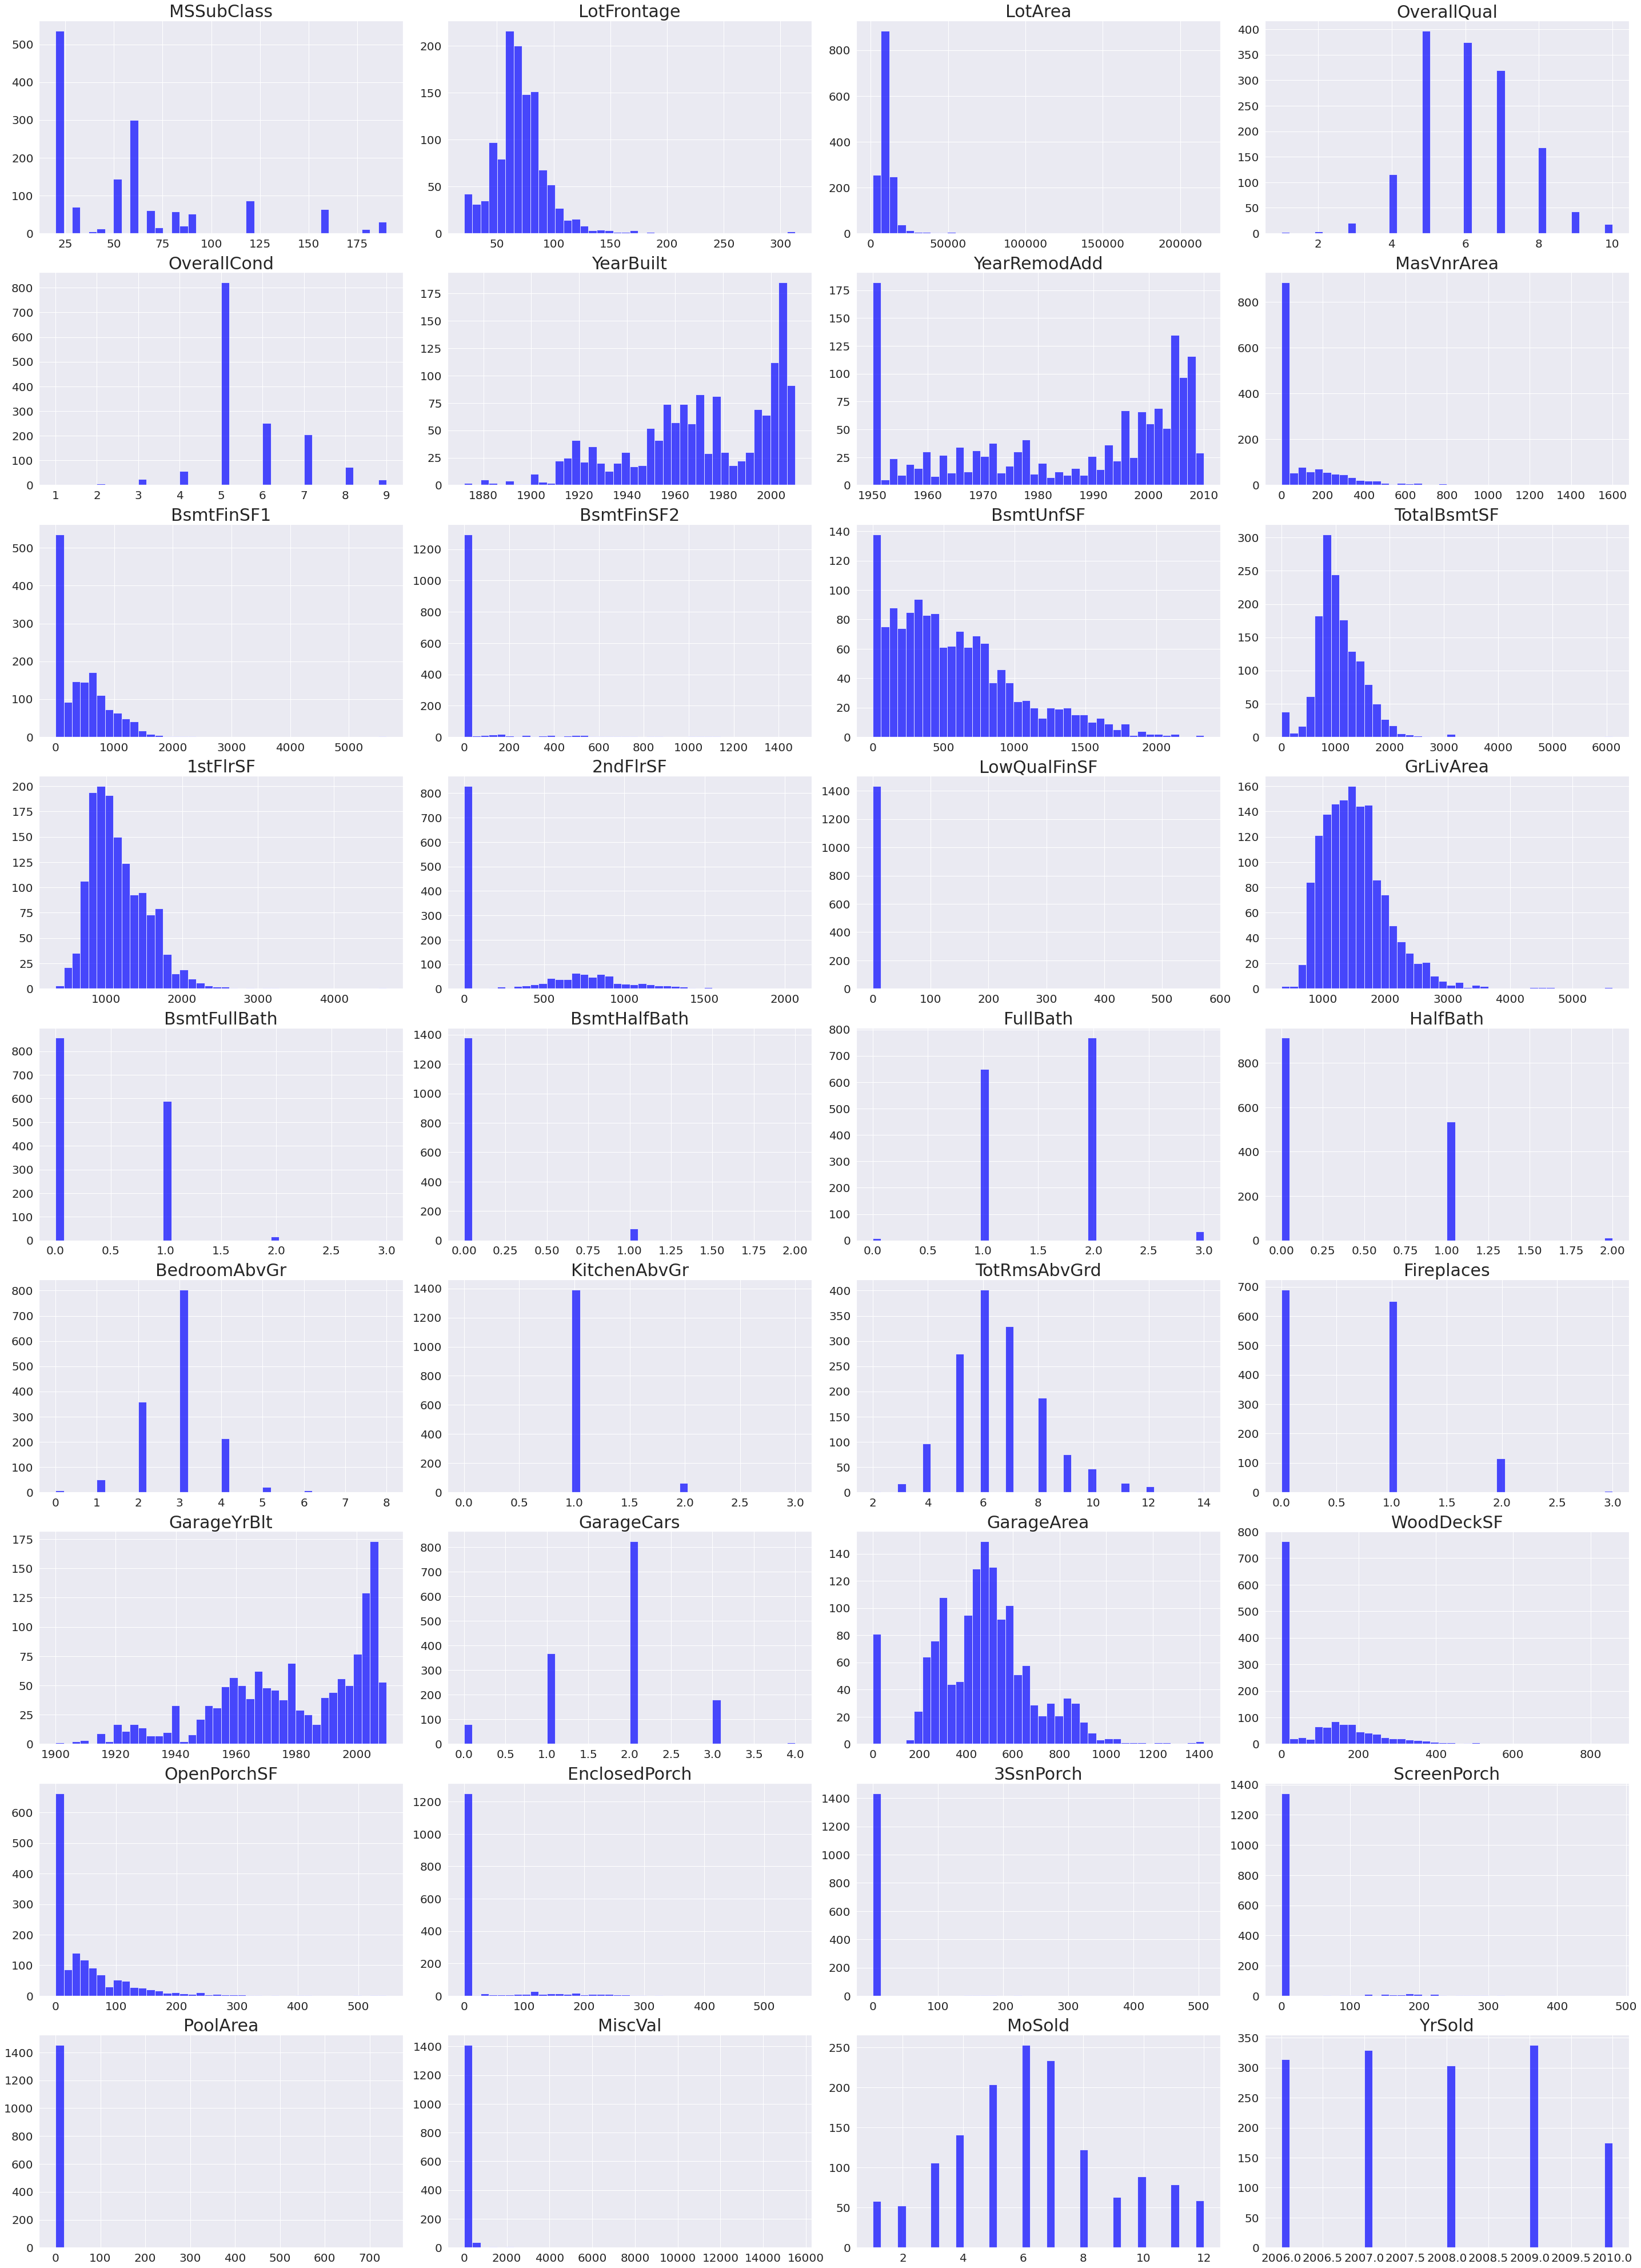

In [32]:
'''Plot histogram of numerical variables to validate pandas intuition.'''

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'blue',alpha=0.7, figsize = (40, 60))
        ax.set_title(var_name, fontsize = 30)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(raw_train[numeric_columns].drop(columns=['Id']), numeric_columns[1:], 9, 4)

**Explore some columns and their correlations**

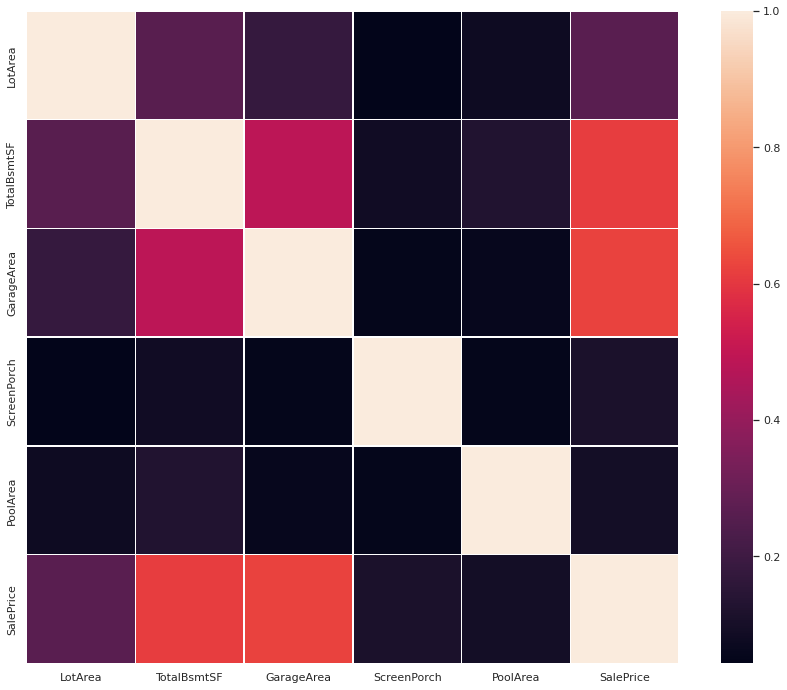

In [33]:
explore_columns = ["LotArea", "TotalBsmtSF", "GarageArea", "ScreenPorch", "PoolArea","SalePrice"]


corr = raw_train[explore_columns].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmax=1, square=True)

**Explore some columns and their correlation to SalePrice**

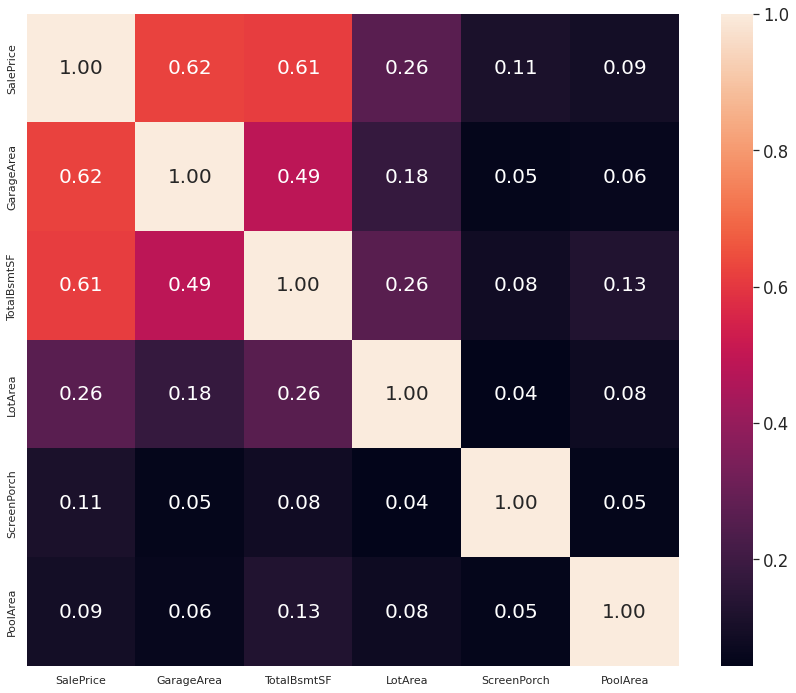

In [34]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(raw_train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**General correlation heatmap for columns**

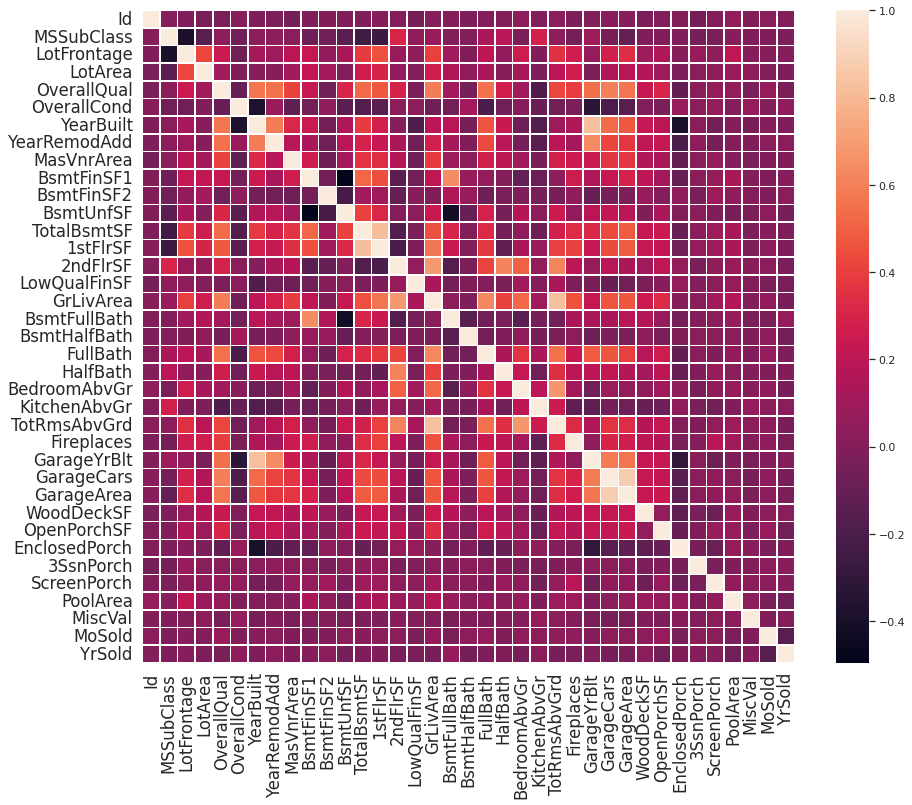

In [ ]:

corr = raw_train[numeric_columns].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1)
sns.heatmap(corr, linewidths=.5, vmax=1, square=True)

### **Data Preprocessing**

We can see that in each example, the first feature is the ID. This helps the model identify each training example. While this is convenient, it does not carry any information for prediction purposes. Hence, we will remove it from the dataset before feeding the data into the model. Besides, given a wide variety of data types, we will need to preprocess the data before we can start modeling. Let's start with the numerical features. First, we apply a heuristic, [**replacing all missing values by the corresponding feature's mean.**] Then, to put all features on a common scale, we (***standardize* the data by rescaling features to zero mean and unit variance**): $$x \leftarrow \frac{x - \mu}{\sigma},$$ where $\mu$ and $\sigma$ denote mean and standard deviation, respectively. To verify that this indeed transforms our feature (variable) such that it has zero mean and unit variance, note that $E[\frac{x-\mu}{\sigma}] = \frac{\mu - \mu}{\sigma} = 0$ and that $E[(x-\mu)^2] = (\sigma^2 + \mu^2) - 2\mu^2+\mu^2 = \sigma^2$. Intuitively, we standardize the data for two reasons. First, it proves convenient for optimization. Second, because we do not know *a priori* which features will be relevant, we do not want to penalize coefficients assigned to one feature more than on any other. [**Next we deal with discrete values.**] This includes features such as "MSZoning". (**We replace them by a one-hot encoding**) in the same way that we previously transformed multiclass labels into vectors. 

For instance, "`MSZoning`" assumes the values "`RL`" and "`RM`". Dropping the "`MSZoning`" feature, two new indicator features "`MSZoning_RL`" and "`MSZoning_RM`" are created with values being either 0 or 1. According to one-hot encoding, if the original value of "MSZoning" is "RL", then "MSZoning_RL" is 1 and "MSZoning_RM" is 0. 

The `pandas` package does this automatically for us.

In [35]:
label = 'SalePrice'

features = pd.concat(
        (raw_train.drop(columns=['Id', label]),
         raw_test.drop(columns=['Id'])))

# Standardize numerical columns
numeric_features = features.dtypes[features.dtypes!='object'].index
features[numeric_features] = features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))

# Replace NAN numerical features by 0
features[numeric_features] = features[numeric_features].fillna(0)

# Replace discrete features by one-hot encoding
features = pd.get_dummies(features, dummy_na=True)


# Save preprocessed features
train = features[:raw_train.shape[0]].copy()
label = raw_train[label]
test = features[raw_train.shape[0]:].copy()



train.shape, test.shape

((1460, 331), (1459, 331))

You can see that this conversion increases the number of features from 79 to 331 (excluding ID and label columns).


**Now, let's convert the data to tensors for tensor operations**

In [36]:
train, label = tf.constant(train.values), tf.constant(label.values)

train.shape, label.shape

(TensorShape([1460, 331]), TensorShape([1460]))


### **Building the model**


Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using `keras.Sequential`. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

* Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.
* Optimizer - how the model is updated based on the data it sees and its loss function.
* Metrics - used to monitor the training and testing steps.


Let's build a network with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):



In [38]:
def build_model(feature_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation=tf.nn.relu, input_shape=[feature_size]),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer="adam", 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model


### **Train the model**


Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the train features and train labels arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set—in this example, the test_features array. We verify that the predictions match the labels from the test_labels array.



To start training, call the `model.fit` method—the model is "`fit`" to the training data:



In [39]:
feature_size = 331
model = build_model(feature_size)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train, label, 
                    epochs=10, 
                    verbose=1, 
                    validation_split = 0.1,
                    callbacks=[early_stop])

Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: 39364788224.0000 - mae: 181501.5469 - mse: 39364788224.0000 - val_loss: 36093558784.0000 - val_mae: 175656.5000 - val_mse: 36093558784.0000
Epoch 2/10
42/42 [==============================] - 0s 5ms/step - loss: 39361163264.0000 - mae: 181492.3125 - mse: 39361163264.0000 - val_loss: 36089356288.0000 - val_mae: 175645.2969 - val_mse: 36089356288.0000
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 39356076032.0000 - mae: 181479.2500 - mse: 39356076032.0000 - val_loss: 36083671040.0000 - val_mae: 175630.1562 - val_mse: 36083671040.0000
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 39349362688.0000 - mae: 181462.0312 - mse: 39349362688.0000 - val_loss: 36076417024.0000 - val_mae: 175610.8438 - val_mse: 36076417024.0000
Epoch 5/10
42/42 [==============================] - 0s 5ms/step - loss: 39340994560.0000 - mae: 181440.5312 - mse: 39340994560.0000 - val_loss: 36067475

---

As you notice the training can produce the progress by setting the `verbose` parameter. If you train the model for a long time, this can take a lot of lines. We can update this progress by speciall callback. 

Here, we build a callback class to help us show the progress without so many lines and information.


In [42]:
# this helps makes our output less verbose but still shows progress
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: 
          print('')
        print('.', end='')


feature_size = 331
model = build_model(feature_size)


early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train, label, epochs=200, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])


..................................................
..................................................
..................................................
..................................................

You can study the progress after the training using the history feedback

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,3.936525e+10,181502.875000,3.936525e+10,3.609448e+10,175658.96875,3.609448e+10,0
1,3.936270e+10,181496.296875,3.936270e+10,3.609155e+10,175651.18750,3.609155e+10,1
2,3.935912e+10,181487.156250,3.935912e+10,3.608757e+10,175640.59375,3.608757e+10,2
3,3.935440e+10,181474.953125,3.935440e+10,3.608237e+10,175626.81250,3.608237e+10,3
4,3.934835e+10,181459.593750,3.934835e+10,3.607594e+10,175609.71875,3.607594e+10,4


Let's plot the training and validation error

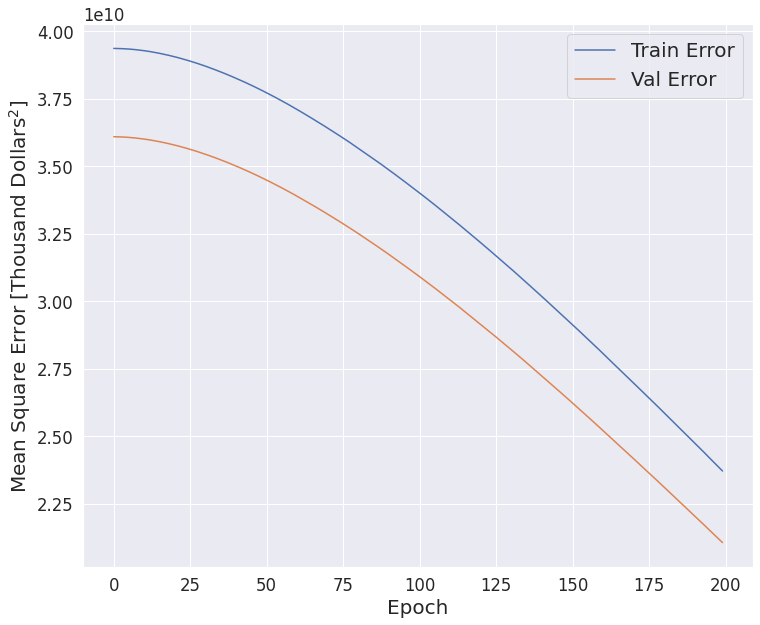

In [44]:
def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]',fontsize=20)
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend(prop={'size': 20})


plot_history(hist)

If you want more information about the model, you can use the `model.summary()` function.

You can see the layers and parameters per layer.

In [45]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 20)                6640      
                                                                 
 dense_30 (Dense)            (None, 1)                 21        
                                                                 
Total params: 6,661
Trainable params: 6,661
Non-trainable params: 0
_________________________________________________________________


**Can we update the optimizers?**


*  SGD
* RMSprop
* Adam
* AdamW
* Adadelta
* Adagrad
* Adamax
* Adafactor
* Nadam

Yes, here is [Keras optimizers](https://keras.io/api/optimizers/)


<br>
<br>

**Can we update the loss?**

Yes, here is [Keras losses](https://keras.io/api/losses/)

In [46]:
#define the optimizer
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                                    beta_1=0.9,
                                    beta_2=0.999)
#define the loss
loss_ = tf.keras.losses.MeanSquaredError()

#define the number of units per layer
unit_size = 50

def build_mlp_model(feature_size, unit_size, opt_, loss_):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(unit_size, activation=tf.nn.relu, input_shape=[feature_size]),
        tf.keras.layers.Dense(unit_size, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer=opt_, 
                  loss=loss_,
                  metrics=['mae', 'mse'])
    return model


mlp = build_mlp_model(feature_size, unit_size, adam_opt, loss_)

mlp.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 50)                16600     
                                                                 
 dense_32 (Dense)            (None, 50)                2550      
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


---
Now, you can update the `build_mlp_model` function to build any defined number of layers 

In [47]:
#define the optimizer
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                                    beta_1=0.9,
                                    beta_2=0.999)
#define the loss
loss_ = tf.keras.losses.MeanSquaredError()

#define the number of units per layer
unit_size = 50
n_hidden_layers = 10

def build_mlp_model(feature_size, n_hidden_layers, unit_size, opt_, loss_):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(unit_size, activation=tf.nn.relu, input_shape=[feature_size])        
    ])

    for i in range(n_hidden_layers):
      model.add(tf.keras.layers.Dense(unit_size, activation=tf.nn.relu))

    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer=opt_, 
                  loss=loss_,
                  metrics=['mae', 'mse'])
    
    return model


mlp = build_mlp_model(feature_size, n_hidden_layers, unit_size, adam_opt, loss_)

mlp.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 50)                16600     
                                                                 
 dense_35 (Dense)            (None, 50)                2550      
                                                                 
 dense_36 (Dense)            (None, 50)                2550      
                                                                 
 dense_37 (Dense)            (None, 50)                2550      
                                                                 
 dense_38 (Dense)            (None, 50)                2550      
                                                                 
 dense_39 (Dense)            (None, 50)                2550      
                                                                 
 dense_40 (Dense)            (None, 50)              

---

**What about the layer weights/biases initialization?!**

Here's we update the weight intialization to `tf.keras.initializers.HeUniform()` and the bias initialization to `tf.keras.initializers.Zeros()`

<br>


<br>

What other initialization methods are available? 

In [48]:
#define the optimizer
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                                    beta_1=0.9,
                                    beta_2=0.999)
#define the loss
loss_ = tf.keras.losses.MeanSquaredError()

#define the number of units per layer
unit_size = 50
n_hidden_layers = 3

def build_mlp_model(feature_size, n_hidden_layers, unit_size, opt_, loss_):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(unit_size, activation=tf.nn.relu, input_shape=[feature_size],
                              kernel_initializer=tf.keras.initializers.HeUniform(),
                              bias_initializer=tf.keras.initializers.Zeros())        
    ])

    for i in range(n_hidden_layers):
      model.add(tf.keras.layers.Dense(unit_size, 
                                      activation=tf.nn.relu,
                                      kernel_initializer=tf.keras.initializers.HeUniform(),
                                      bias_initializer=tf.keras.initializers.Zeros()
                                      ))

    model.add(tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.HeUniform(),
                                      bias_initializer=tf.keras.initializers.Zeros()))
    
    model.compile(optimizer=opt_, 
                  loss=loss_,
                  metrics=['mae', 'mse'])
    
    return model


mlp = build_mlp_model(feature_size, n_hidden_layers, unit_size, adam_opt, loss_)

mlp.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 50)                16600     
                                                                 
 dense_47 (Dense)            (None, 50)                2550      
                                                                 
 dense_48 (Dense)            (None, 50)                2550      
                                                                 
 dense_49 (Dense)            (None, 50)                2550      
                                                                 
 dense_50 (Dense)            (None, 1)                 51        
                                                                 
Total params: 24,301
Trainable params: 24,301
Non-trainable params: 0
_________________________________________________________________



---

**What about the layer weights/biases regularization ?!**


In [49]:
#define the optimizer
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                                    beta_1=0.9,
                                    beta_2=0.999)
#define the loss
loss_ = tf.keras.losses.MeanSquaredError()

#define the number of units per layer
unit_size = 50
n_hidden_layers = 3

def build_mlp_model(feature_size, n_hidden_layers, unit_size, opt_, loss_):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(unit_size, activation=tf.nn.relu, input_shape=[feature_size])        
    ])

    for i in range(n_hidden_layers):
      model.add(tf.keras.layers.Dense(unit_size, 
                                      activation=tf.nn.relu,
                                      kernel_initializer=tf.keras.initializers.HeUniform(),
                                      bias_initializer=tf.keras.initializers.Zeros(),
                                      kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                      bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                      ))

    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer=opt_, 
                  loss=loss_,
                  metrics=['mae', 'mse'])
    
    return model


mlp = build_mlp_model(feature_size, n_hidden_layers, unit_size, adam_opt, loss_)

mlp.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 50)                16600     
                                                                 
 dense_52 (Dense)            (None, 50)                2550      
                                                                 
 dense_53 (Dense)            (None, 50)                2550      
                                                                 
 dense_54 (Dense)            (None, 50)                2550      
                                                                 
 dense_55 (Dense)            (None, 1)                 51        
                                                                 
Total params: 24,301
Trainable params: 24,301
Non-trainable params: 0
_________________________________________________________________





---


**End of notebook!**
